# Coursework 2  
# Modeling 

## Introduction and Aim

The first part of data processing including data of dishcarge, temperature and snow cover has already been completed in the first part of coursework. In this coursework 2, the data of 2005 and 2006 will be used and the modelling part will be completed below. 

This report aims to provide assessment of environmental variables and modelling in the year of 2005 at the Del Norte monitoring station of Colorado, USA. 

Data was adopted from NOAA. Some basic geographical data on the station is given below:

Station Name: DEL NORTE 2E   
Latitude: -106.30833  
Longitude: 37.69083   
Elevation: 7845 ft.

The purpose of this report is to build the 'flow' model of 2005 to illustrate the main process of flow increasement. Based on this model, the current environmental situation can be known. More importantly, based on this model, the prediction may be conducted through this model. It is one of significant part of climate change research.     

## Method

###### Firstly, the calibration.          
The threshold temperature 'Tthresh' should be calculated in order to know at which degree the snow would melt as water, and the melting snow water is part of 'flow'. In order to complete this task, calculating function and cost function should be developed. And then the optimization function is also needed to be developed so as to seek the values of solution, which is also the calibration. All these tasks done, the model (2005) can be built up. 

###### Secondly, the validation.      
After completing the task of calculating the values of solution of 2005, these values should be put into doing the modelling of 2006 to see whether it is still fits, which is also the validation. In other words, to see whether snow started melting at the same temperature with 2005. If it does not fit or if there is a large gap of Tthresh between 2005 and 2006, the problem of climate change is happening. Biscally, the Tthresh between two closed years should not have a big gap, may be a little change, but not a big gap.

Uncertainty is helps to expand the range of values, so it is also done below.

Ideally, if possible, a general model can be built which is fitted for all years.     


### Data Preparation
And try to do the calculation function! 

In [1]:
#import necessary moduels needed in the coding

import requests
import numpy as np
import numpy.ma as ma
import pandas as pd
from dateutil import parser
import matplotlib.pylab as plt
%matplotlib inline
import sys
import os
from pathlib import Path
import gdal
from datetime import datetime, timedelta
from geog0111.geog_data import procure_dataset
import glob
from geog0111.create_blank_file import create_blank_file
from geog0111.get_modis_files import get_modis_files
import pickle
import pylab as plt
import scipy
import scipy.ndimage.filters
from scipy.optimize import minimize

In [3]:
#to see how the data looks like
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

pkl_file = open('data/data2005new.pkl', 'rb')
data05 = pickle.load(pkl_file, encoding='latin1')
pkl_file.close()
print(data05)

{'doy': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178,

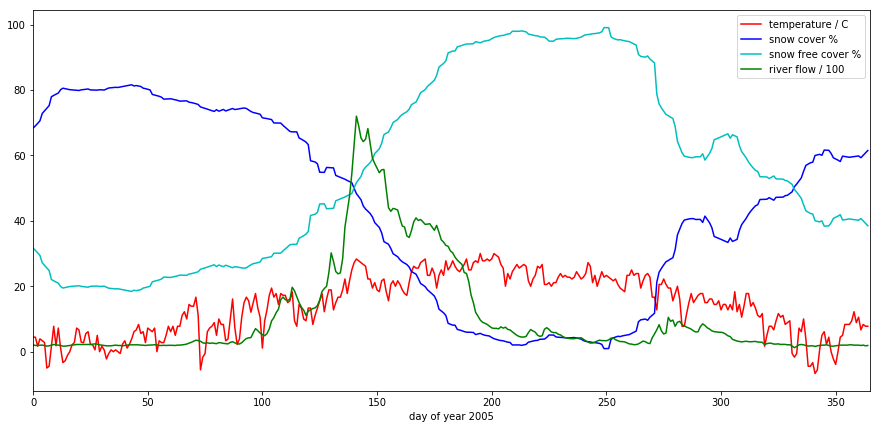

In [4]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

# set up plot
plt.figure(figsize=(15,7))
plt.xlim(data05['doy'][0],data05['doy'][-1]+1)
plt.xlabel('day of year 2005')

# plot data
plt.plot(data05['doy'],data05['temp'],'r',label='temperature / C')
plt.plot(data05['doy'],data05['snowprop']*100,'b',label='snow cover %')
plt.plot(data05['doy'],100-data05['snowprop']*100,'c',label='snow free cover %')
plt.plot(data05['doy'],data05['flow']/100.,'g',label='river flow / 100')
plt.legend(loc='best')

F_base05 = 203.8709677419355
k(2005) =  34461.69851535219


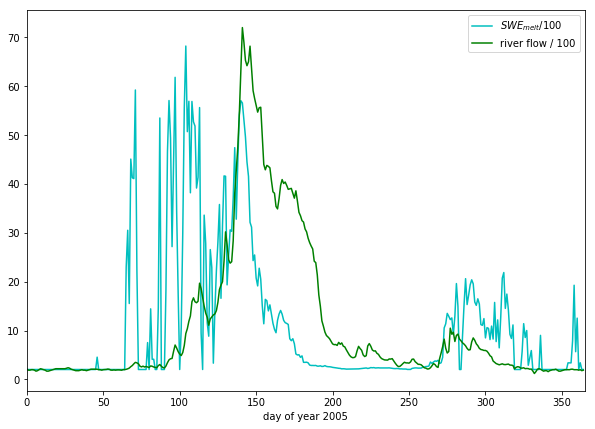

In [5]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
# Guess a value, it can be anything but better between 0-10
Tthresh = 8

# the base flow can be estimated from mean January value
F_base05 = data05['flow'][:31].mean()
print(f'F_base05 = {F_base05}')

p = data05['snowprop']
k_p = (data05['temp'] - Tthresh)/data05['temp'].max()
k_p = np.max([np.zeros_like(k_p),k_p],axis=0)
swe_melt_k05  = p * p * k_p

# take away the base flow from flow
nonbase_flow05 = data05['flow'] - F_base05

# calculate the k value
k = nonbase_flow05.sum() / swe_melt_k05.sum()
print('k(2005) = ',k)

model_flow05 = swe_melt_k05 * k + F_base05

# set up plot
plt.figure(figsize=(10,7))
plt.xlim(data05['doy'][0],data05['doy'][-1]+1)
plt.xlabel('day of year 2005')

# plot data
plt.plot(data05['doy'],model_flow05/100,'c',label='$SWE_{melt}$/100')
plt.plot(data05['doy'],data05['flow']/100.,'g',label='river flow / 100')
plt.legend(loc='best')

Text(0.5,1,'network response function $m=0.05$')

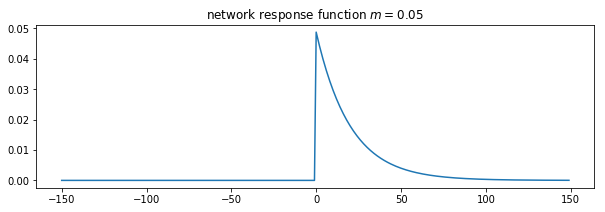

In [6]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#decay parameter nrf = exp(-m x)
#m should be in the area of (0,1)

m  = 0.05

plt.figure(figsize=(10,3))
ndays = 15 * int(1/m)
nrf_x = np.arange(ndays) - ndays/2
#calculate the nrf value
nrf05 = np.exp(-m*nrf_x)
nrf05[nrf_x<0] = 0

# normalise so that sum is 1
nrf05 = nrf05/nrf05.sum()

# plot
plt.plot(nrf_x,nrf05)
plt.title(f'network response function $m={m}$')

#this cell is to do the smooth (probably )

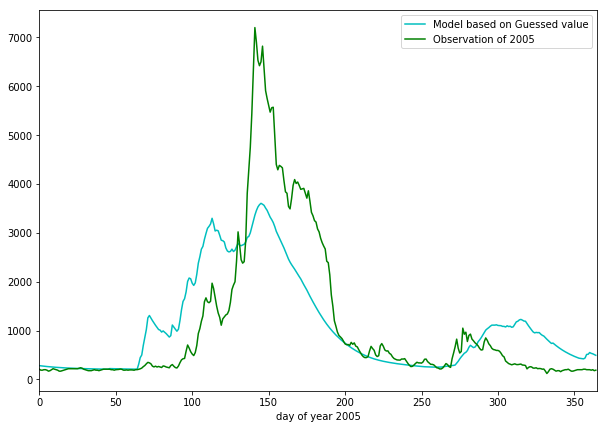

In [7]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

#convolve NRF with data
model_flow_nrf05 = scipy.ndimage.filters.convolve1d(model_flow05, nrf05)

#to see the figure plotted based on the guessed m and Tthresh

plt.figure(figsize=(10,7))
plt.xlim(data05['doy'][0],data05['doy'][-1]+1)
plt.xlabel('day of year 2005')

plt.plot(data05['doy'],model_flow_nrf05,'c',label='Model based on Guessed value')
plt.plot(data05['doy'],data05['flow'],'g',label='Observation of 2005')
plt.legend(loc='best')

As can be seen, the guessing value does not match the real data. 
Hence, the optimization should be done to seek the value of solution, then to build the model of 2005.

### The equations needed to calculate the parameters of model 

The equations for doing the calculation part written below. The values of m and Tthresh are needed to be calculated. The value of m should be falled in the interval (0, 1). As for the value of Tthresh, it is expected to equal 0 ℃ that would be the ideal situation when coming to 0 ℃, the snow begins to melt. But it might be less possible to happen. Sometimes, the melting temperature is higher than 0 ℃ or lower.          
The reason why snow does not always begin to melt at 0 ℃ is complicated. Generally, snow begins to melt when it is above the freezing temperature. Situation might be changed for some reasons. For example, sun shines on the snow and it absorbs energy or the snow is not pure water. 


#### Snow water equivalent
$
SWE = A p d
$

$
d = \frac{k}{A} p
$


$
SWE = k p^2
$

#### Snow water melt 

$
SWE_{melt}(t) = k_p(t) {SWE}(t)
$

$
k_p(T) = \frac{T-T_{thresh}}{T_{max}}
$

#### Base flow

$
F_{non-base}(t) = F(t) - F_{base}
$

#### Total amount of flow

$
{F}_{model}(t) =  F_{base} + SWE_{melt}(t)
$


$
{F}_{model}(t) =  F_{base} + k MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)
$

$
\Sigma_t{{F}_{model}(t)} = \Sigma_t{F(t)}
$


$
\Sigma_t{F(t)} = \Sigma_t{F_{base}} + k \Sigma_t{MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)}
$


$
k  = \frac{\Sigma_t{\left( F(t) - F_{base} \right) }}{\Sigma_t{MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)}}
$











## Calibration
In this part, calibration will be completed below.

### Cost Function 
Before doing the optimization, the calculating function and cost function should be done.

In [9]:
"""
This code after the model developed in
"Chapter 7" "Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#define a function named "morning" to do the calculation
def morning(p,t):
    m,Tthresh=p
    F_base05 = data05['flow'][:31].mean()

    p = data05['snowprop']
    k_p = (data05['temp'] - Tthresh)/data05['temp'].max()
    k_p = np.max([np.zeros_like(k_p),k_p],axis=0)
    swe_melt_k05 = p * p * k_p

    nonbase_flow05 = data05['flow'] - F_base05

    k = nonbase_flow05.sum() / swe_melt_k05.sum()
    model_flow05 = swe_melt_k05 * k + F_base05
    
    ndays = 15 * float(1/m)
    nrf_x = np.arange(ndays) - ndays/2
    nrf05 = np.exp(-m*nrf_x)
    nrf05[nrf_x<0] = 0
    nrf05 = nrf05/nrf05.sum()
    
    model_flow_nrf05 = scipy.ndimage.filters.convolve1d(model_flow05, nrf05)
    
    return model_flow_nrf05

#define a cost function

def cost_function(p,t, obs05,func=morning):
    #p=m,Tthresh
    pred05 = func(p,t)
    cost = -0.5* (pred05 - obs05)**2
    return -cost.sum()

#to test whether the cost function works well 

obs05=data05['flow']
t=np.arange(0,365)
print('Cost(2005) = ',cost_function(p,t,obs05))

Cost(2005) =  293585061.1997621


### Optimisation 

To do the optimisation, two test has been setted in order to check whether the cost function works normally. 
After being checked, the value of the solution and fitted model can be conducted through the minimization. 


Cost(2005, 1st try) =  151672124.1611005
Cost(2005, 2nd try) =  143687226.9655726
Value of the function at the minimum: 2.82004e+07
Value of the solution: [ 0.06072827 15.69817149]


Text(0.5,1,'Fitted Model')

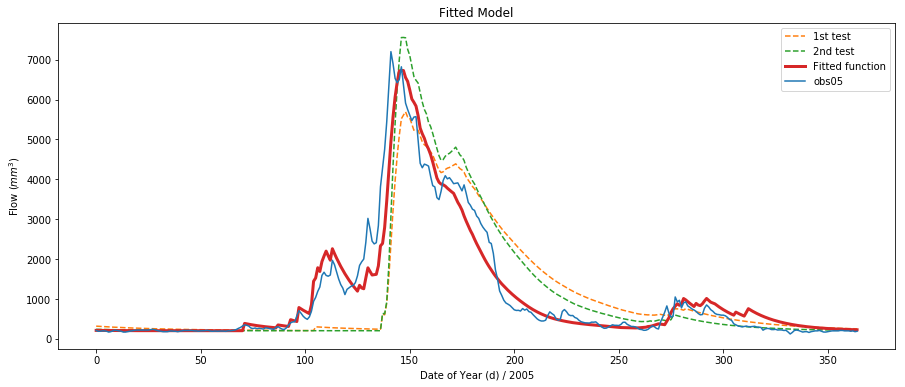

In [10]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""

plt.figure(figsize=(15, 6))
t=np.arange(0,365)

# Plot the observations of 2005
plt.errorbar(t, data05['flow'], fmt="-", mfc="none", label='obs05')

#two tests have been conducted below to test the cost function by using radom parameters again.
#Plot a first prediction with some random model parameters
p0= np.array([0.03,19])
plt.plot(t, morning(p0,t), '--', label="1st test")
print("Cost(2005, 1st try) = ",cost_function(p0, t, data05['flow']))

#second test
p0 = np.array([0.04,20])
plt.plot(t,morning(p0,t), '--', label="2nd test")      #SWE, same with the plt.plot(morning(p,t))
print("Cost(2005, 2nd try) = ", cost_function(p0, t,data05['flow']))

#minimize can do the optimization in order to find out the value of the solution, 
#which means the real value of m and Tthresh based on the data.

retval05 = minimize(cost_function, p0,args=(p0,data05['flow']),bounds=((0.00000,0.999999),(None, None)))

print(f"Value of the function at the minimum: {retval05.fun:g}")
print(f"Value of the solution: {str(retval05.x):s}")

# Plot the fitted model
plt.plot(t, morning(retval05.x, t), '-', lw=3,label="Fitted function")
plt.ylabel("Flow ($mm^{3}$)")
plt.xlabel("Date of Year (d) / 2005")
plt.legend(loc="best")
plt.title('Fitted Model')

After calculating the value of the function at the minimum, the figure of modelling and observation can be plotted.  

In this part, the modelling of 2005 will be built up, including do the calculation, cost function, optimisation.   

The values of the solution are m=0.06 and Tthresh=15.7 ℃ respectively.

Text(0.5, 1.0, 'Modelling and Observation of 2005')

<Figure size 720x216 with 0 Axes>

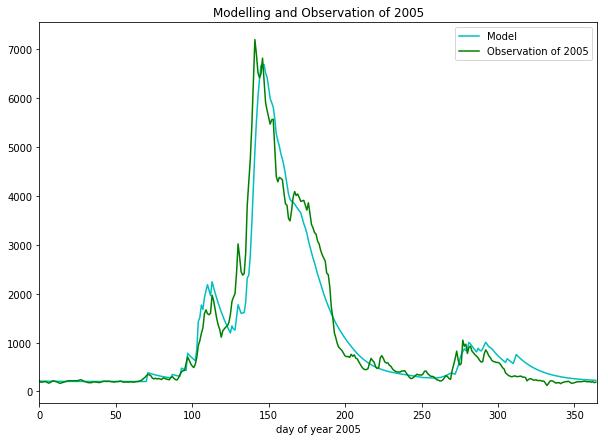

In [4]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#to build up the model here 

Tthresh = 15.7
F_base05 = data05['flow'][:31].mean()

p = data05['snowprop']
k_p = (data05['temp'] - Tthresh)/data05['temp'].max()
k_p = np.max([np.zeros_like(k_p),k_p],axis=0)
swe_melt_k05  = p * p * k_p

nonbase_flow05 = data05['flow'] - F_base05

k = nonbase_flow05.sum() / swe_melt_k05.sum()

model_flow05 = swe_melt_k05 * k + F_base05

m  = 0.06

plt.figure(figsize=(10,3))
ndays = 15 * int(1/m)
nrf_x = np.arange(ndays) - ndays/2
nrf05 = np.exp(-m*nrf_x)
nrf05[nrf_x<0] = 0
nrf05 = nrf05/nrf05.sum()

model_flow_nrf05 = scipy.ndimage.filters.convolve1d(model_flow05, nrf05)

plt.figure(figsize=(10,7))
plt.xlim(data05['doy'][0],data05['doy'][-1]+1)
plt.xlabel('day of year 2005')
plt.plot(data05['doy'],model_flow_nrf05,'c',label='Model')
plt.plot(data05['doy'],data05['flow'],'g',label='Observation of 2005')
plt.legend(loc='best')
plt.title('Modelling and Observation of 2005')

## Summary Table

In [9]:
#provide a table to show the result

a=m
b=Tthresh
sdf1=pd.DataFrame([a,b],columns=['Values of solution (2005)'],index=['m','Tthresh'])
print(sdf1)

         Values of solution (2005)
m                             0.06
Tthresh                      15.70


## Validation

To use the value of the solution of 2005 to build the model of 2006, to see whether it is still fitted in 2006.

In [17]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#to open the data of 2006
pkl_file = open('data/data2006.pkl', 'rb')
data06 = pickle.load(pkl_file, encoding='latin1')
pkl_file.close()

F_base06 = 171.61290322580646


<Figure size 720x216 with 0 Axes>

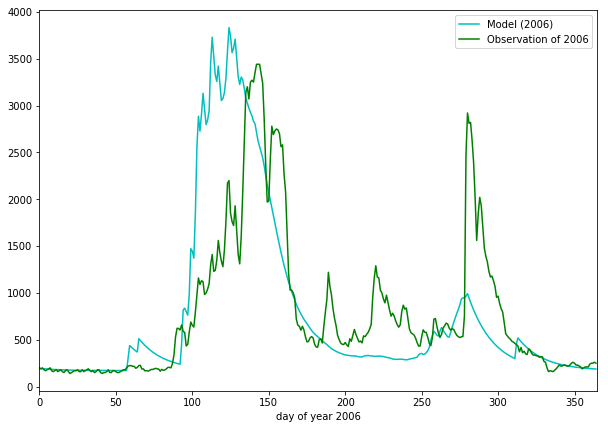

In [20]:
"""
This code after the model developed in
"Chapter 8"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#put the sloution of 2005 to build up the model of 2006
#to see whether it still fits to 2006
Tthresh = 15.7

F_base06 = data06['flow'][:31].mean()
print(f'F_base06 = {F_base06}')

p = data06['snowprop']
k_p = (data06['temp'] - Tthresh)/data06['temp'].max()
k_p = np.max([np.zeros_like(k_p),k_p],axis=0)
swe_melt_k06 = p * p * k_p

nonbase_flow06 = data06['flow'] - F_base06

k = nonbase_flow06.sum() / swe_melt_k06.sum()

model_flow06 = swe_melt_k06 * k + F_base06

m  = 0.06

plt.figure(figsize=(10,3))
ndays = 15 * int(1/m)
nrf_x = np.arange(ndays) - ndays/2
nrf06 = np.exp(-m*nrf_x)
nrf06[nrf_x<0] = 0

nrf06 = nrf06/nrf06.sum()

model_flow_nrf06 = scipy.ndimage.filters.convolve1d(model_flow06, nrf06)

plt.figure(figsize=(10,7))
plt.xlim(data06['doy'][0],data06['doy'][-1]+1)
plt.xlabel('day of year 2006')
plt.plot(data06['doy'],model_flow_nrf06,'c',label='Model (2006)')
plt.plot(data06['doy'],data06['flow'],'g',label='Observation of 2006')
plt.legend(loc='best')

As can be seen, the values of solution of 2005 does not fit to the year of 2006.            
From the shape showed above, the Tthresh of 2006 is likely to be very different with the 2005. Therefore, building the model of 2006 by using the values of solution of 2005 is not accurate enough. 

### Uncertainty
The uncertainty is based on the dataset of 2005 since the model is developed from 2005. 

Indeed, the model of 2005 is well-fitted the dataset of 2005, but it does not fit in the 2006. Although the optimisation can be done again to find out the values of solution of 2006, however, it is not effective if doing the optimisation for every year.  Hence, doing the uncertainty is a good way to solve this problem.       

The Monte Carlo sampling around the optimal solution is a effective method to test the model. The uncertainty can be told from the shape of cost function around the optimal point which can be realized by Metropolis Hastings algorithm. When the parameters are changed, the fitted values also changed so as to seek the solution. 
More specific, what the uncertainty function provides below is a samll grey area of possible values of solution arounding the model, which means the model can be changed within the grey area. 



In [79]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
def metropolis_hastings(xstart, lklhood, n_iter=50000):
    n_params = len(xstart)
    samples = np.zeros((n_iter, n_params))
    x_curr = xstart*1.                                #set up a start
    old_cost = lklhood(x_curr, t, data05['flow'])     #calculate the cost function
    for i in range(n_iter):                            
        x_proposed = x_curr + np.random.normal(size=n_params)*np.array([0.01,0.999])   
        proposed_cost = lklhood(x_proposed, t, data05['flow'])
        if np.random.rand() < np.exp(proposed_cost - old_cost):    #to set up Metropolis acceptance: 
            x_curr = x_proposed                          #to set up an area and decide whether the value is accpted
            old_cost = proposed_cost
        samples[i, :] = x_proposed

    return samples

In [80]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
#to do the likelihood 
#biscally it is very similar to the cost function, which may be replaced by cost function 
def lklhood(p, t, obs05, func=morning):
    pred05 = func(p, t)
    cost = -0.5* (pred05-obs05)**2
    return cost.sum()

samples = metropolis_hastings(retval05.x, lklhood,n_iter=100000)

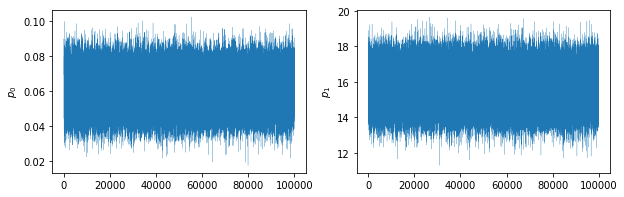

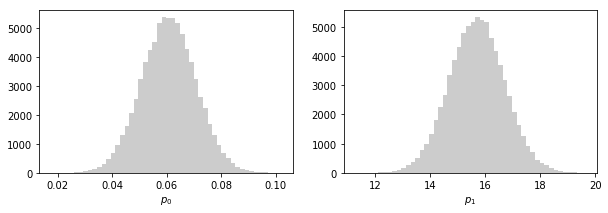

In [81]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=True)
axs = axs.flatten()
for i in range(len(retval05.x)):
    axs[i].plot(samples[:, i], '-', lw=0.2)
    axs[i].set_ylabel(f"$p_{i}$")
    
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
axs = axs.flatten()
for i in range(len(retval05.x)):
    axs[i].hist(samples[20000:, i], bins=50, color="0.8")
    axs[i].set_xlabel(f"$p_{i}$")

The model is relatively stable.

Text(0.5,0,'DoY [d]')

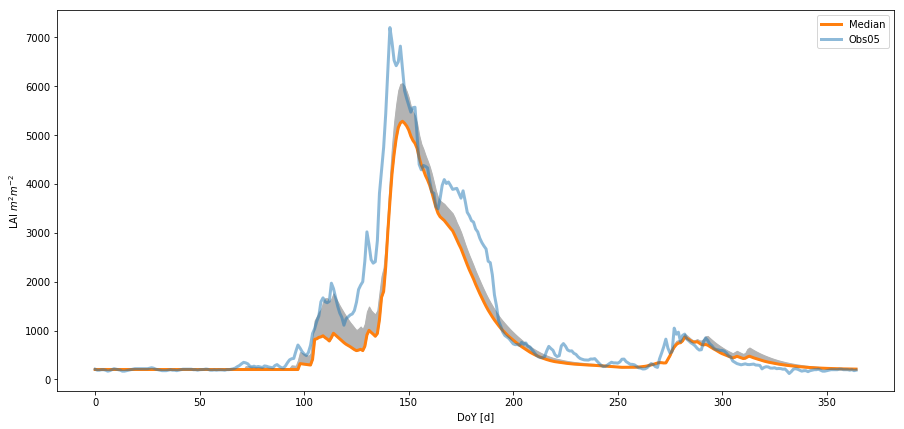

In [88]:
"""
This code after the model developed in
"Chapter 7"
by P. Lewis
https://github.com/profLewis/geog0111
My modifications have been to make the coding more efficient.
"""
n_samples = samples.shape[0]

pred = np.zeros((n_samples, len(t)))
for i in range(n_samples):
    pred[i, :] = morning(samples[i], t)

plt.figure(figsize=(15, 7))
plt.errorbar(t, data05['flow'], fmt="-", lw=3, mfc="none", label=f"Obs05", alpha=0.5)
pcntiles = np.percentile( pred[60000::20], [5, 25], axis=0)
plt.fill_between(t, pcntiles[0], pcntiles[-1], color="0.9")
plt.fill_between(t, pcntiles[1], pcntiles[-2], color="0.7")
plt.plot(t, pcntiles[0], '-', lw=3, label="Median")

plt.legend(loc="best")
plt.ylabel("LAI $m^{2}m^{-2}$")
plt.xlabel("DoY [d]")

The grey area is the area conducted by the uncertainty function which is the variation range of model.

## Discussion 

The calibration has been done above as well as the values of solution and modelling of 2005, the validation by using the dataset of 2006 and the unceratinty function based on the dataset of 2005.                    
From the results of optimal parameters calculated aboved, the best temperature threshold is 15.7 ℃ in 2005. However, it is the ideal situation that snow begins to melt when coming to this temperature. It ignores other influencing factors, such as solar radiation, snow that containg other substance, which also affect the snowmelt.
More importantly, in the uncertainty function, the model of 2005 is relatively stable. The gray area shows the range of variation of this model, which is adjustable.
When doing the validation, it is clear to observe that the modelling of 2006 is unsatisfactory, which means the Tthresh of 2006 may be very different with the 2005 based on the graph showed above. But why the Tthresh of such closed two years could be so different? It varies from multiple reasons.                           
The coefficient k is a constant value which has been computed above. As the season and climate changing, the change of the coefficient k may reselut from the amount of snowfall as well as the density and depth of snow. Furthermore, the natural interaction and process is likely to affect the accuracy of result. It is still a difficulty of solving this problem in an efficient way.  More attention should be paid on ecosystem analysis is essential. Also the cliamte change problem should arouse public's attention that green and environmental-fridendly living should be promoted to mitigate the effects brought by climate change.       



## Conclusion

The model is still imperfect. Some solutions may be taken to improve the accuracy of the model, such as taking more parameters into consideration based on the consideration of the influence factors. However, not all the influencing factors should be taken into consideration for the reason that there are a large amount of factors may affect the model. Some significant factors should be added into the model. The natural process and climate change problem are hard to be predicted accurately. Biscally, what can be done is to generate the influencing factors and transform them as suitable parameters.                        
In conclusion, indee, the model is still not perfect from its performance, but both the concept and the method used above worths is worthy of further discussion and in-depth study. 